In [579]:
##采用map_tanh进行采样
import numpy as np
def map_clip(old,coup,bias,a,b,noi):   #linear map with clipping
    return np.clip(a*old+b*np.dot(coup,old)+.40*b*bias+np.random.normal(0,noi,len(old)),-.4,.4)
def map_cos(old,coup,bias,a,b,noi):   #linear map with clipping
    return np.clip(a*old+b*np.dot(coup,old)+.40*b*bias+np.random.normal(0,noi,len(old)),-.4,.4)
def map_pol(old,coup,bias,a,b,noi):   #linear map with clipping
    return np.clip((a)*old-old**3+b*np.dot(coup,old)+np.abs(np.max(old))*b*bias+np.random.normal(0,noi,len(old)),-10,10)
def map_tanh(old,coup,bias,a,b,noi):   #linear map with clipping
    return np.tanh(a*old+b*np.dot(coup,old)+np.abs(np.max(old))*b*bias+np.random.normal(0,noi,len(old)))
def ising_energy(stuff,ad,bias):
    return -0.5*1*np.dot(stuff,np.dot(ad,stuff))-np.sum(np.dot(bias,stuff))
def ising_energy2(stuff,ad,bias):
    return -np.dot(stuff,np.dot(ad,stuff))-np.sum(np.dot(bias,stuff))
def ising_sample(array,NN,n_hid,noise,_a,_b):   
    global result
    global ens2
    global ad
    global chain
    global bias
    test=np.array(array)
    N=int(np.max(test)) #number of nodes
    ad=np.zeros((N,N)) #adjacency matrix
    for i in range(0,len(test)): #initialize
        ad[int(test[i,0])-1,int(test[i,1])-1]+=(test[i,2])
    bias=np.zeros(N)
    for i in range(0,N):
        bias[i]+=ad[i,i]
        ad[i,i]=0
    # parameters for alpha and beta
    a=_a
    b=_b
    noise_strength=noise
    chain=np.zeros(N)
    ens2=np.zeros(NN)
    result=np.zeros((NN,N))
    for i in range(0,NN):
        chain=map_tanh(chain,ad,bias,a,b,noise_strength) 
        chain=0.5*(np.sign(chain)+1)
        ens2[i]=ising_energy2(chain,ad,bias)
    # return [0.5*(np.sign(result[:,:n_hid])+1),0.5*(np.sign(result[:,n_hid:])+1)]
    return ens2

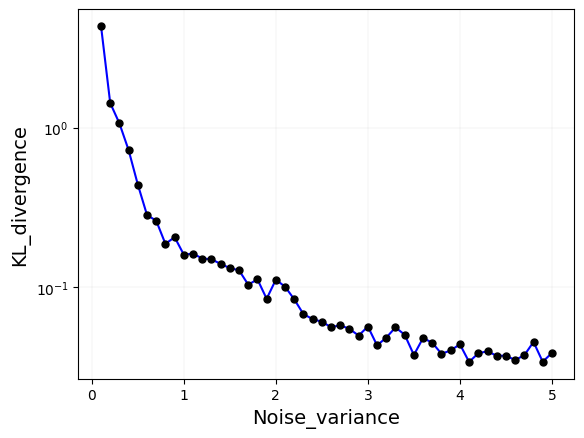

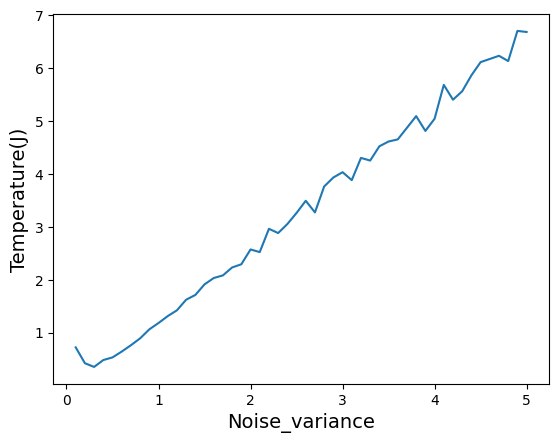

In [586]:
from collections import Counter
import math
import csv
# 定义参数
NN = 10000  # 采样次数
n_hid = 2  # 隐藏层节点数
start = 0.1
step = 0.1
num_elements = 50
# 计算结束值
stop = start + step * (num_elements - 1)
# 创建向量
noise_levels = np.arange(start, stop + step, step) 
# noise_levels = np.linspace(0.1, 5, 20)   # 不同噪声强度
# 存储采样结果
samples = {} #对于某个采样的能量分布
energy_distributions = defaultdict(list)
pro_ans=[]
values=[]
noise_ans=[]
array=[ [1,2,-0.5],
    [1,1,1.4],
      [1,3,0.1],
       [2,1,-0.5],
       [3,1,0.1],
       [2,2,-0.7],
       [3,3,0.1],
       [1,4,1.1],
       [4,1,1.1],
       [4,4,-1.3]
] 

kl_ans=[]
a=0.2
b=0.7
T_ans=[]
for noise in noise_levels:
    data= ising_sample(array,NN, n_hid ,noise,a,b)
        # 统计每个数的频率
    counter = Counter(data)
    numbers = np.array(list(counter.keys()))  # 数的大小
    frequencies = np.array(list(counter.values()))  # 频率
    all_counts=np.sum(frequencies)
    P=frequencies/all_counts
    x=numbers.flatten()
    y=np.log(P.flatten())
    coefficients = np.polyfit(x, y, 1)
    slope=coefficients[0]
    intercept = coefficients[1]  # 截距
    Q=np.exp(slope * x + intercept)
    kl=0
    # k=1.380649e-23
    T=-1/(slope)
    T_ans.append(round(T,2))
    # 计算KL散度
    for i in range(len(P)):
        if P[i] > 0 and Q[i] > 0:  # 避免除以零的情况
            kl += P[i] * math.log(P[i] / Q[i])
    kl_ans.append(kl)
# T_ans=np.array(T_ans)
plt.xlabel('Noise_variance', fontsize=14)
plt.ylabel('KL_divergence', fontsize=14)
plt.yscale('symlog', linthresh=0.1)  # linthresh 参数定义了线性部分的范围
plt.grid(True, which="both", linestyle='-', linewidth=0.1)
plt.plot(noise_levels, np.array(kl_ans), color='blue', label='kl随着噪声变化曲线',marker='o',markersize=5, markerfacecolor='black', markeredgecolor='black')
# # 使用zip函数将两个数组打包成元组列表
plt.show()
data = zip(noise_levels, T_ans)
plt.xlabel('Noise_variance', fontsize=14)
plt.ylabel('Temperature(J)', fontsize=14)
plt.plot(noise_levels,T_ans)
plt.show()

Text(0, 0.5, 'Log_Probabilities')

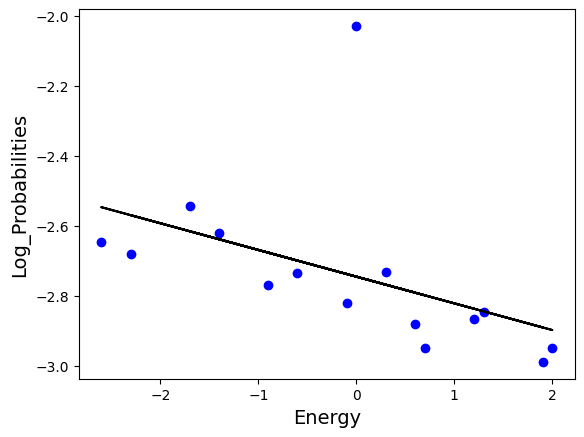

In [587]:
noise=10
data= ising_sample(array,NN, n_hid ,noise,a,b)
        # 统计每个数的频率
counter = Counter(data)
numbers = np.array(list(counter.keys()))  # 数的大小
frequencies = np.array(list(counter.values()))  # 频率
all_counts=np.sum(frequencies)
P=frequencies/all_counts
x=numbers.flatten()
y=np.log(P.flatten())
coefficients = np.polyfit(x, y, 1)
slope=coefficients[0]
intercept = coefficients[1]  # 截距
Q=np.exp(slope * x + intercept)
kl=0
k=1.380649e-23
plt.scatter(numbers, y,c='blue')
plt.plot(x, slope * x + intercept, color='black', label='拟合直线')
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Log_Probabilities', fontsize=14)

In [588]:
##采用map_clip进行采样
import numpy as np
def map_clip(old,coup,bias,a,b,noi):   #linear map with clipping
    return np.clip(a*old+b*np.dot(coup,old)+.40*b*bias+np.random.normal(0,noi,len(old)),-.4,.4)
def ising_energy(stuff,ad,bias):
    return -0.5*1*np.dot(stuff,np.dot(ad,stuff))-np.sum(np.dot(bias,stuff))
def ising_energy2(stuff,ad,bias):
    return -np.dot(stuff,np.dot(ad,stuff))-np.sum(np.dot(bias,stuff))
def ising_sample(array,NN,n_hid,noise,_a,_b):   
    global result
    global ens2
    global ad
    global chain
    global bias
    test=np.array(array)
    N=int(np.max(test)) #number of nodes
    ad=np.zeros((N,N)) #adjacency matrix
    for i in range(0,len(test)): #initialize
        ad[int(test[i,0])-1,int(test[i,1])-1]+=(test[i,2])
    bias=np.zeros(N)
    for i in range(0,N):
        bias[i]+=ad[i,i]
        ad[i,i]=0
    # parameters for alpha and beta
    a=_a
    b=_b
    noise_strength=noise
    chain=np.zeros(N)
    ens2=np.zeros(NN)
    result=np.zeros((NN,N))
    for i in range(0,NN):
        chain=map_clip(chain,ad,bias,a,b,noise_strength) 
        chain=0.5*(np.sign(chain)+1)
        ens2[i]=ising_energy2(chain,ad,bias)
    # return [0.5*(np.sign(result[:,:n_hid])+1),0.5*(np.sign(result[:,n_hid:])+1)]
    return ens2

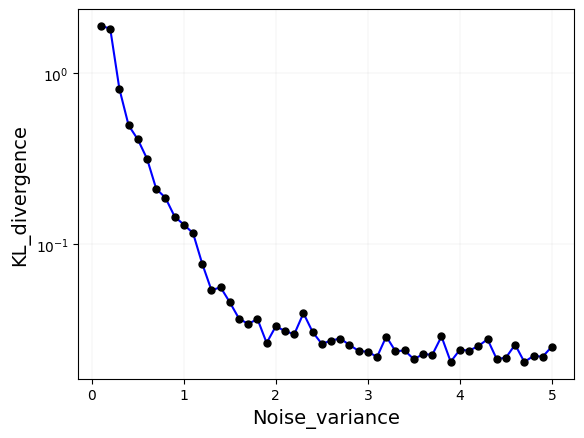

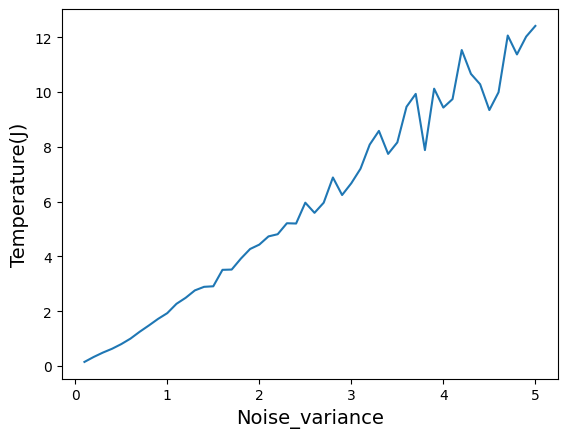

In [589]:
from collections import Counter
import math
import csv
# 定义参数
NN = 10000  # 采样次数
start = 0.1
step = 0.1
num_elements = 50
# 计算结束值
stop = start + step * (num_elements - 1)
# 创建向量
noise_levels = np.arange(start, stop + step, step) 
# noise_levels = np.linspace(0.1, 5, 20)   # 不同噪声强度
# 存储采样结果
samples = {} #对于某个采样的能量分布
energy_distributions = defaultdict(list)
pro_ans=[]
values=[]
noise_ans=[]
array=[ [1,2,-0.5],
    [1,1,1.4],
      [1,3,0.1],
       [2,1,-0.5],
       [3,1,0.1],
       [2,2,-0.7],
       [3,3,0.1],
       [1,4,1.1],
       [4,1,1.1],
       [4,4,-1.3]
] 

kl_ans=[]
a=0.2
b=0.7
T_ans=[]
for noise in noise_levels:
    data= ising_sample(array,NN, n_hid ,noise,a,b)
        # 统计每个数的频率
    counter = Counter(data)
    numbers = np.array(list(counter.keys()))  # 数的大小
    frequencies = np.array(list(counter.values()))  # 频率
    all_counts=np.sum(frequencies)
    P=frequencies/all_counts
    x=numbers.flatten()
    y=np.log(P.flatten())
    coefficients = np.polyfit(x, y, 1)
    slope=coefficients[0]
    intercept = coefficients[1]  # 截距
    Q=np.exp(slope * x + intercept)
    kl=0
    # k=1.380649e-23
    T=-1/(slope)
    T_ans.append(round(T,2))
    # 计算KL散度
    for i in range(len(P)):
        if P[i] > 0 and Q[i] > 0:  # 避免除以零的情况
            kl += P[i] * math.log(P[i] / Q[i])
    kl_ans.append(kl)
# T_ans=np.array(T_ans)
plt.xlabel('Noise_variance', fontsize=14)
plt.ylabel('KL_divergence', fontsize=14)
plt.yscale('symlog', linthresh=0.1)  # linthresh 参数定义了线性部分的范围
plt.grid(True, which="both", linestyle='-', linewidth=0.1)
plt.plot(noise_levels, np.array(kl_ans), color='blue', label='kl随着噪声变化曲线',marker='o',markersize=5, markerfacecolor='black', markeredgecolor='black')
# # 使用zip函数将两个数组打包成元组列表
plt.show()
data = zip(noise_levels, T_ans)
plt.xlabel('Noise_variance', fontsize=14)
plt.ylabel('Temperature(J)', fontsize=14)
plt.plot(noise_levels,T_ans)
plt.show()

Text(0, 0.5, 'Log_Probabilities')

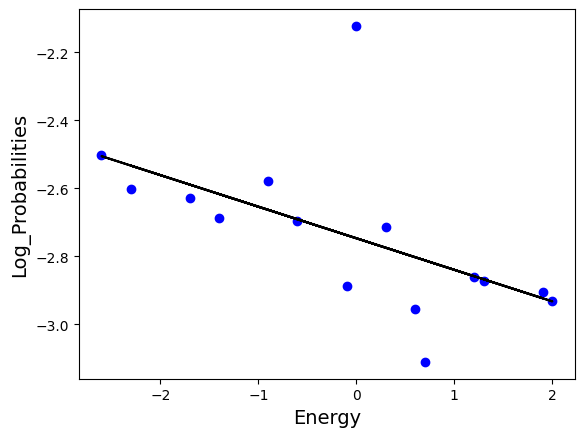

In [590]:
noise=5
data= ising_sample(array,NN, n_hid ,noise,a,b)
        # 统计每个数的频率
counter = Counter(data)
numbers = np.array(list(counter.keys()))  # 数的大小
frequencies = np.array(list(counter.values()))  # 频率
all_counts=np.sum(frequencies)
P=frequencies/all_counts
x=numbers.flatten()
y=np.log(P.flatten())
coefficients = np.polyfit(x, y, 1)
slope=coefficients[0]
intercept = coefficients[1]  # 截距
Q=np.exp(slope * x + intercept)
kl=0
k=1.380649e-23
plt.scatter(numbers, y,c='blue')
plt.plot(x, slope * x + intercept, color='black', label='拟合直线')
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Log_Probabilities', fontsize=14)

In [591]:
##采用map_pol进行采样
import numpy as np
def map_pol(old,coup,bias,a,b,noi):   #linear map with clipping
    return np.clip((a)*old-old**3+b*np.dot(coup,old)+np.abs(np.max(old))*b*bias+np.random.normal(0,noi,len(old)),-10,10)
def ising_energy(stuff,ad,bias):
    return -0.5*1*np.dot(stuff,np.dot(ad,stuff))-np.sum(np.dot(bias,stuff))
def ising_energy2(stuff,ad,bias):
    return -np.dot(stuff,np.dot(ad,stuff))-np.sum(np.dot(bias,stuff))
def ising_sample(array,NN,n_hid,noise,_a,_b):   
    global result
    global ens2
    global ad
    global chain
    global bias
    test=np.array(array)
    N=int(np.max(test)) #number of nodes
    ad=np.zeros((N,N)) #adjacency matrix
    for i in range(0,len(test)): #initialize
        ad[int(test[i,0])-1,int(test[i,1])-1]+=(test[i,2])
    bias=np.zeros(N)
    for i in range(0,N):
        bias[i]+=ad[i,i]
        ad[i,i]=0
    # parameters for alpha and beta
    a=_a
    b=_b
    noise_strength=noise
    chain=np.zeros(N)
    ens2=np.zeros(NN)
    result=np.zeros((NN,N))
    for i in range(0,NN):
        chain=map_pol(chain,ad,bias,a,b,noise_strength) 
        chain=0.5*(np.sign(chain)+1)
        ens2[i]=ising_energy2(chain,ad,bias)
    # return [0.5*(np.sign(result[:,:n_hid])+1),0.5*(np.sign(result[:,n_hid:])+1)]
    return ens2

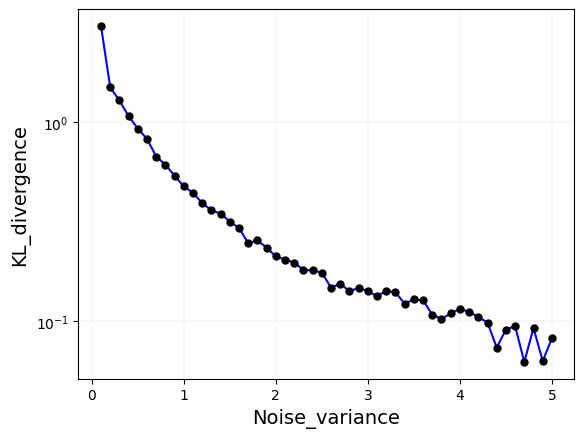

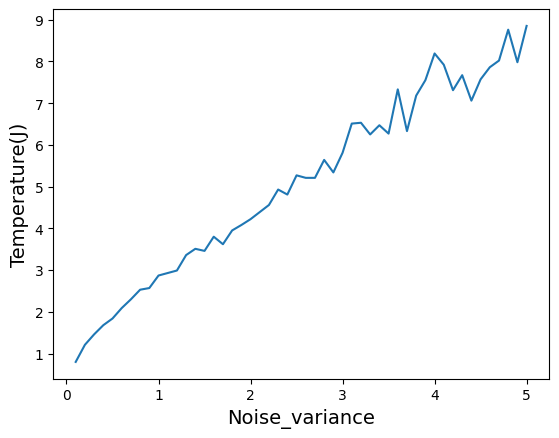

In [592]:
from collections import Counter
import math
import csv
# 定义参数
NN = 10000  # 采样次数
start = 0.1
step = 0.1
num_elements = 50
# 计算结束值
stop = start + step * (num_elements - 1)
# 创建向量
noise_levels = np.arange(start, stop + step, step) 
# noise_levels = np.linspace(0.1, 5, 20)   # 不同噪声强度
# 存储采样结果
samples = {} #对于某个采样的能量分布
energy_distributions = defaultdict(list)
pro_ans=[]
values=[]
noise_ans=[]
array=[ [1,2,-0.5],
    [1,1,1.4],
      [1,3,0.1],
       [2,1,-0.5],
       [3,1,0.1],
       [2,2,-0.7],
       [3,3,0.1],
       [1,4,1.1],
       [4,1,1.1],
       [4,4,-1.3]
] 

kl_ans=[]
a=0.2
b=0.7
T_ans=[]
for noise in noise_levels:
    data= ising_sample(array,NN, n_hid ,noise,a,b)
        # 统计每个数的频率
    counter = Counter(data)
    numbers = np.array(list(counter.keys()))  # 数的大小
    frequencies = np.array(list(counter.values()))  # 频率
    all_counts=np.sum(frequencies)
    P=frequencies/all_counts
    x=numbers.flatten()
    y=np.log(P.flatten())
    coefficients = np.polyfit(x, y, 1)
    slope=coefficients[0]
    intercept = coefficients[1]  # 截距
    Q=np.exp(slope * x + intercept)
    kl=0
    # k=1.380649e-23
    T=-1/(slope)
    T_ans.append(round(T,2))
    # 计算KL散度
    for i in range(len(P)):
        if P[i] > 0 and Q[i] > 0:  # 避免除以零的情况
            kl += P[i] * math.log(P[i] / Q[i])
    kl_ans.append(kl)
# T_ans=np.array(T_ans)
plt.xlabel('Noise_variance', fontsize=14)
plt.ylabel('KL_divergence', fontsize=14)
plt.yscale('symlog', linthresh=0.1)  # linthresh 参数定义了线性部分的范围
plt.grid(True, which="both", linestyle='-', linewidth=0.1)
plt.plot(noise_levels, np.array(kl_ans), color='blue', label='kl随着噪声变化曲线',marker='o',markersize=5, markerfacecolor='black', markeredgecolor='black')
# # 使用zip函数将两个数组打包成元组列表
plt.show()
data = zip(noise_levels, T_ans)
plt.xlabel('Noise_variance', fontsize=14)
plt.ylabel('Temperature(J)', fontsize=14)
plt.plot(noise_levels,T_ans)
plt.show()

Text(0, 0.5, 'Log_Probabilities')

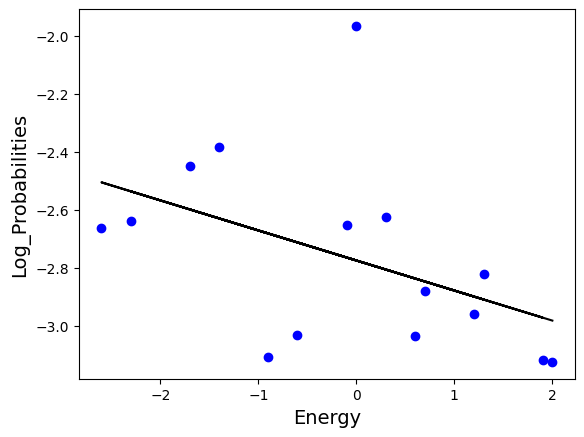

In [593]:
noise=5
data= ising_sample(array,NN, n_hid ,noise,a,b)
        # 统计每个数的频率
counter = Counter(data)
numbers = np.array(list(counter.keys()))  # 数的大小
frequencies = np.array(list(counter.values()))  # 频率
all_counts=np.sum(frequencies)
P=frequencies/all_counts
x=numbers.flatten()
y=np.log(P.flatten())
coefficients = np.polyfit(x, y, 1)
slope=coefficients[0]
intercept = coefficients[1]  # 截距
Q=np.exp(slope * x + intercept)
kl=0
k=1.380649e-23
plt.scatter(numbers, y,c='blue')
plt.plot(x, slope * x + intercept, color='black', label='拟合直线')
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Log_Probabilities', fontsize=14)